In [1]:
import numpy as np
import matplotlib.pyplot as plt

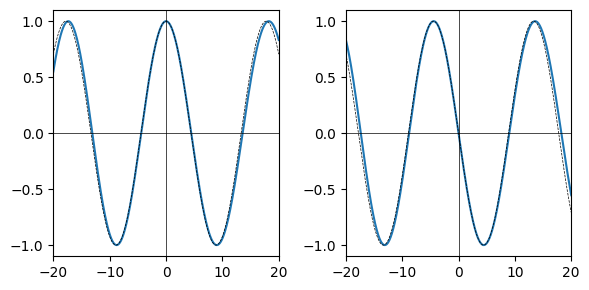

In [33]:
qmax = 20
q = np.linspace(-qmax, qmax, qmax*100)
lam = 0.5
theta = np.pi/2-0.001
#theta = 0.1
psi = np.exp(1j * (q**2/(2*np.tan(theta)) - lam/(np.sqrt(2) * np.sin(theta)) * q))

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
ax0 = axes[0]
ax0.plot(q, psi.real)
ax0.plot(q, np.exp(1j*(-lam/np.sqrt(2) * q)).real, linestyle='--', color='black', linewidth=0.5)
ax0.axvline(x=lam/(np.sqrt(2) * np.cos(theta)), linestyle='--', color='black', linewidth=0.5)
ax0.axhline(y=0, linestyle='-', color='black', linewidth=0.5)
ax0.axvline(x=0, linestyle='-', color='black', linewidth=0.5)
ax0.set_xlim(-qmax, qmax)

ax1 = axes[1]
ax1.plot(q, psi.imag)
ax1.plot(q, np.exp(1j*(-lam/np.sqrt(2) * q)).imag, linestyle='--', color='black', linewidth=0.5)
ax1.axvline(x=lam/(np.sqrt(2) * np.cos(theta)), linestyle='--', color='black', linewidth=0.5)
ax1.axhline(y=0, linestyle='-', color='black', linewidth=0.5)
ax1.axvline(x=0, linestyle='-', color='black', linewidth=0.5)
ax1.set_xlim(-qmax, qmax)
plt.tight_layout()
plt.show()